In [1]:
import pandas as pd

In [2]:
applicationdf = pd.read_csv(r"C:\Users\godis\Desktop\OneDrive - University of Strathclyde\CS989\Assignment\DataSet\application_data.csv.csv")

In [3]:
applicationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
print(applicationdf.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [5]:
applicationdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# data loaded in data frame
missing_percentage = applicationdf.isnull().sum() * 100 / len(applicationdf)

# Identifying columns where more than 50% of the data is missing
high_missing_cols = missing_percentage[missing_percentage > 50].sort_values(ascending=False)

# Storing the list of columns to drop
cols_to_drop = high_missing_cols.index.tolist()

# Dropping the columns
applicationdf.drop(columns=cols_to_drop, inplace=True)

#checking wether columns dropped or not
print("Columns Dropped (over 50% missing data):", cols_to_drop)
print(f"New DataFrame shape: {applicationdf.shape}")

Columns Dropped (over 50% missing data): ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE']
New DataFrame shape: (307511, 81)


In [7]:
applicationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [8]:
# Finding all remaining columns that are numerical (float or int) AND have missing values
# Re-running the original check on the updated DataFrame
numerical_missing_cols = applicationdf.select_dtypes(include=['float64', 'int64']).columns[applicationdf.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()

print("--- Numerical Columns to Impute ---")
print(numerical_missing_cols)
print("-----------------------------------")

for col in numerical_missing_cols:
    median_val = applicationdf[col].median()
    applicationdf[col].fillna(median_val, inplace=True)
    print(f"Imputed numerical column '{col}' with median: {median_val}")

# Verifying all numerical missing values are resolved or not
print("\nVerification: Remaining missing values in numerical columns:")
print(applicationdf[numerical_missing_cols].isnull().sum().sum())

--- Numerical Columns to Impute ---
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
-----------------------------------
Imputed numerical column 'AMT_ANNUITY' with median: 24903.0
Imputed numerical column 'AMT_GOODS_PRICE' with median: 450000.0
Imputed numerical column 'CNT_FAM_MEMBERS' with median: 2.0
Imputed numerical column 'EXT_SOURCE_2' with median: 0.5659614260608526
Imputed numerical column 'EXT_SOURCE_3' with median: 0.5352762504724826
Imputed numerical column 'YEARS_

C:\Users\godis\AppData\Local\Temp\ipykernel_13044\1207936534.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applicationdf[col].fillna(median_val, inplace=True)


In [9]:
# Identifying all remaining categorical columns with missing values
categorical_missing_cols = applicationdf.select_dtypes(include=['object']).columns[applicationdf.select_dtypes(include=['object']).isnull().any()].tolist()

print("\n--- Categorical Columns to Impute ---")
print(categorical_missing_cols)
print("-----------------------------------")

for col in categorical_missing_cols:
    # Filling missing values with 'Missing'
    applicationdf[col].fillna('Missing', inplace=True)
    print(f"Imputed categorical column '{col}' with 'Missing'")

# Verifying that all missing values in the entire DataFrame are resolved
print(f"\nTotal remaining missing values in DataFrame: {applicationdf.isnull().sum().sum()}")


--- Categorical Columns to Impute ---
['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']
-----------------------------------
Imputed categorical column 'NAME_TYPE_SUITE' with 'Missing'
Imputed categorical column 'OCCUPATION_TYPE' with 'Missing'
Imputed categorical column 'EMERGENCYSTATE_MODE' with 'Missing'

Total remaining missing values in DataFrame: 0


C:\Users\godis\AppData\Local\Temp\ipykernel_13044\1702331462.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applicationdf[col].fillna('Missing', inplace=True)


In [10]:
# Identifying all the object columns that need encoding
categorical_cols_to_encode = applicationdf.select_dtypes(include=['object']).columns.tolist()

# Applying One-Hot Encoding and dropping the original categorical columns
applicationdf = pd.get_dummies(applicationdf, columns=categorical_cols_to_encode, drop_first=True)

# Verifying the final shape
print(f"\nFinal DataFrame shape after encoding: {applicationdf.shape}")
print(f"Number of columns after encoding: {applicationdf.shape[1]}")


print("Sample Encoded Columns (First 5 Rows):")
print(applicationdf.filter(regex='_M$|_F$|_Cash_loans$|_Missing$').head())


Final DataFrame shape after encoding: (307511, 184)
Number of columns after encoding: 184
Sample Encoded Columns (First 5 Rows):
   CODE_GENDER_M  NAME_TYPE_SUITE_Missing  OCCUPATION_TYPE_Missing
0           True                    False                    False
1          False                    False                    False
2           True                    False                    False
3          False                    False                    False
4           True                    False                    False


Target Variable Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Proportion of Non-Defaulters (0): 91.93%
Proportion of Defaulters (1): 8.07%


C:\Users\godis\AppData\Local\Temp\ipykernel_13044\4138747666.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'salmon'])


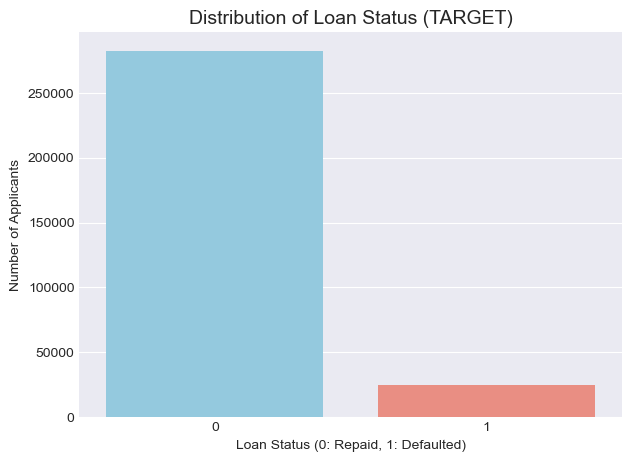

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for better visualization
plt.style.use("seaborn-v0_8-darkgrid")

# 1. Checking the distribution of the TARGET variable
target_counts = applicationdf['TARGET'].value_counts()
target_proportions = target_counts / len(applicationdf) * 100

print("Target Variable Distribution:")
print(target_counts)
print(f"Proportion of Non-Defaulters (0): {target_proportions.iloc[0]:.2f}%")
print(f"Proportion of Defaulters (1): {target_proportions.iloc[1]:.2f}%")

# 2. Visualizing the distribution using a Bar Chart
plt.figure(figsize=(7, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'salmon'])
plt.title('Distribution of Loan Status (TARGET)', fontsize=14)
plt.xlabel('Loan Status (0: Repaid, 1: Defaulted)')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1])
plt.show() 



--- Descriptive Statistics Table ---
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY     DAYS_BIRTH  \
count      3.075110e+05  3.075110e+05  307511.000000  307511.000000   
mean       1.687979e+05  5.990260e+05   27108.487841  -16036.995067   
std        2.371231e+05  4.024908e+05   14493.461065    4363.988632   
min        2.565000e+04  4.500000e+04    1615.500000  -25229.000000   
25%        1.125000e+05  2.700000e+05   16524.000000  -19682.000000   
50%        1.471500e+05  5.135310e+05   24903.000000  -15750.000000   
75%        2.025000e+05  8.086500e+05   34596.000000  -12413.000000   
max        1.170000e+08  4.050000e+06  258025.500000   -7489.000000   

       EXT_SOURCE_2  
count  3.075110e+05  
mean   5.145034e-01  
std    1.908699e-01  
min    8.173617e-08  
25%    3.929737e-01  
50%    5.659614e-01  
75%    6.634218e-01  
max    8.549997e-01  


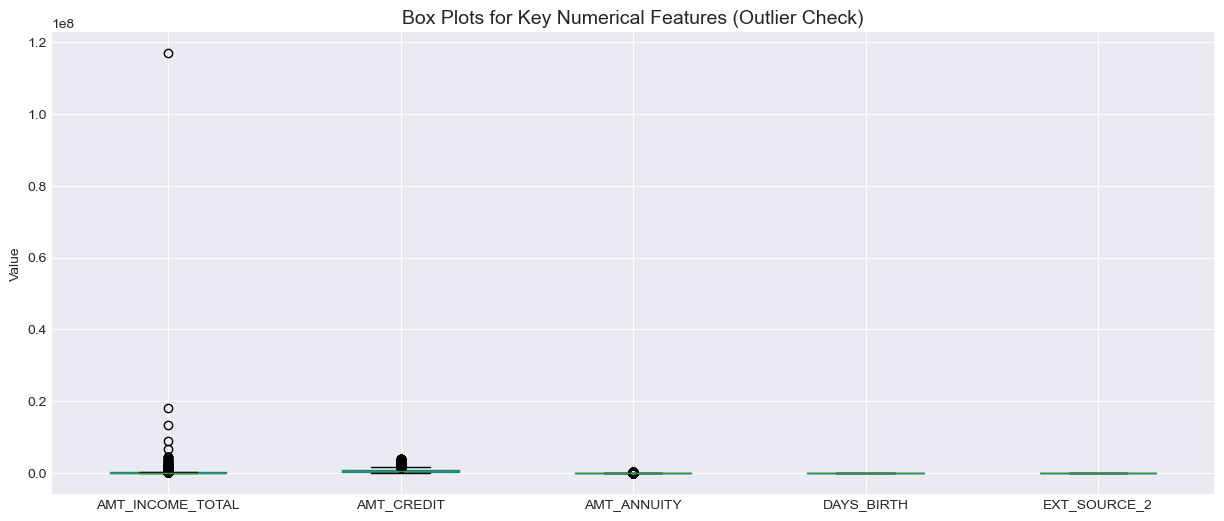

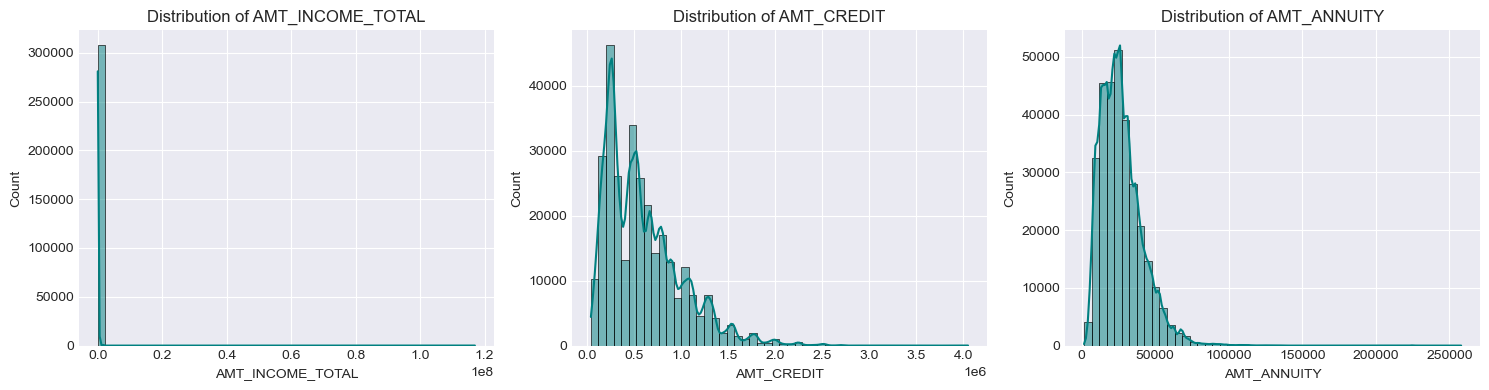

In [12]:
# Selecting the most critical financial and demographic features
key_numeric_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'EXT_SOURCE_2']

# 1. Descriptive Statistics Table
print("\n--- Descriptive Statistics Table ---")
print(applicationdf[key_numeric_features].describe())

# 2. Box Plots
plt.figure(figsize=(15, 6))
applicationdf[key_numeric_features].boxplot()
plt.title('Box Plots for Key Numerical Features (Outlier Check)', fontsize=14)
plt.ylabel('Value')
plt.show() 

# 3. Histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(key_numeric_features[:3]): # Focusing on the monetary columns
    plt.subplot(1, 3, i + 1)
    sns.histplot(applicationdf[col], kde=True, bins=50, color='teal')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()



--- Correlation Matrix (for identifying top predictors) ---
                              TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3  CNT_CHILDREN  REGION_POPULATION_RELATIVE
TARGET                      1.000000         -0.003982   -0.030369    -0.012815    0.078239      -0.044932     -0.160295     -0.155892      0.019187                   -0.037227
AMT_INCOME_TOTAL           -0.003982          1.000000    0.156870     0.191657    0.027261      -0.064223      0.060855     -0.030737      0.012882                    0.074796
AMT_CREDIT                 -0.030369          0.156870    1.000000     0.770127   -0.055436      -0.066838      0.130930      0.036640      0.002145                    0.099738
AMT_ANNUITY                -0.012815          0.191657    0.770127     1.000000    0.009443      -0.104329      0.125509      0.026738      0.021377                    0.118418
DAYS_BIRTH                  0.078239          0.027261

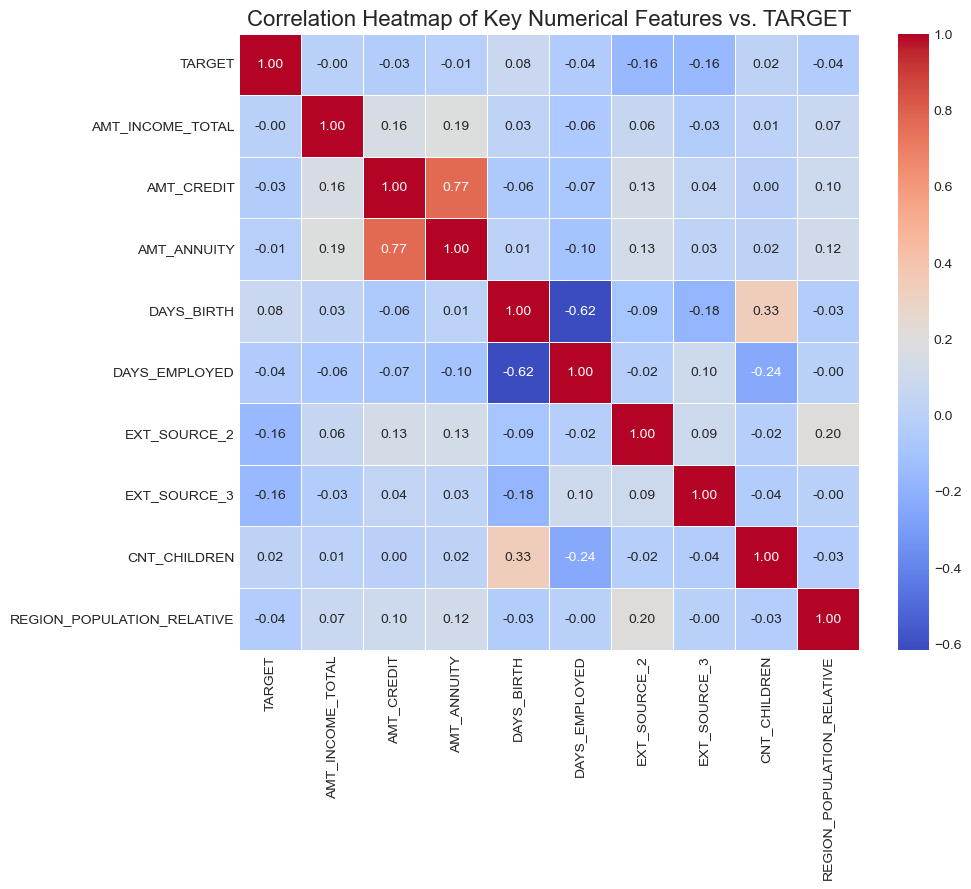

In [13]:
# Assuming our clean DataFrame is named 'df'
numeric_corr_cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                     'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                     'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE']

correlation_matrix = applicationdf[numeric_corr_cols].corr()

# Printing the table
print("\n--- Correlation Matrix (for identifying top predictors) ---")
print(correlation_matrix.to_string())

# Visualizing the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.5)
plt.title('Correlation Heatmap of Key Numerical Features vs. TARGET', fontsize=16)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Using PCA to verify clustering in 2D space

# 1. Selecting key numerical features for clustering (excluding TARGET)
clustering_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
X_cluster = applicationdf[clustering_features]

# 2. Scaling the data (StandardScaler ensures mean=0 and std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
print("Data scaled successfully.")

# 3. Using PCA to reduce dimensions for visualization purposes (2D plot is better for illustration)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced data shape: {X_pca.shape}")

Data scaled successfully.
PCA reduced data shape: (307511, 2)


In [15]:
# Unsupervised Analysis
from sklearn.cluster import KMeans

# 1. Defining the clustering model (K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# 2. Fitting the model to the scaled data
kmeans.fit(X_scaled)

# 3. Adding the cluster labels back to the main DataFrame
applicationdf['Cluster'] = kmeans.labels_

print("K-Means clustering completed with 3 clusters.")

# 4. Analyzing the size of each cluster
print("\nCluster Sizes:")
print(applicationdf['Cluster'].value_counts().sort_index())

K-Means clustering completed with 3 clusters.

Cluster Sizes:
Cluster
0    167683
1         1
2    139827
Name: count, dtype: int64



--- Cluster Profiles (Mean Feature Values) ---
         AMT_INCOME_TOTAL     AMT_CREDIT  EXT_SOURCE_2  EXT_SOURCE_3  \
Cluster                                                                
0            1.760407e+05  710459.315941      0.582783      0.591805   
1            1.170000e+08  562491.000000      0.113161      0.145543   
2            1.592767e+05  465393.466423      0.432624      0.424425   

           DAYS_BIRTH    TARGET  
Cluster                          
0       -18496.962143  0.044125  
1       -12615.000000  1.000000  
2       -13086.983716  0.124618  


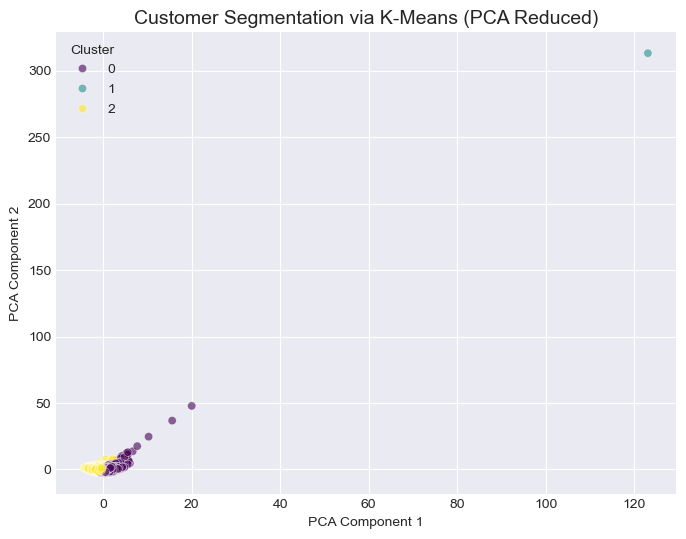

In [16]:
# 1. Analyzing the mean features for each cluster to interpret the groups
cluster_profiles = applicationdf.groupby('Cluster')[clustering_features + ['TARGET']].mean()
print("\n--- Cluster Profiles (Mean Feature Values) ---")
print(cluster_profiles)

# 2. Visualizing the Clusters in 2D Space (using PCA)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=applicationdf['Cluster'], palette='viridis', legend='full', alpha=0.6)
plt.title('Customer Segmentation via K-Means (PCA Reduced)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
# Supervised Analysis

from sklearn.model_selection import train_test_split

# Dropping the SK_ID_CURR (identifier) and the temporary 'Cluster' column before modeling
X = applicationdf.drop(['SK_ID_CURR', 'TARGET', 'Cluster'], axis=1) 
Y = applicationdf['TARGET'] 

# Spliting the data into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

print(f"Data split complete: Train shape = {X_train.shape}, Test shape = {X_test.shape}")

Data split complete: Train shape = (215257, 182), Test shape = (92254, 182)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

# Suppressing convergence warnings for cleaner output
warnings.filterwarnings('ignore')

# 1. Defining the model
model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Training the model
model.fit(X_train, Y_train)

# 3. Predicting on the test set
Y_predicted = model.predict(X_test)

# 4. Evaluating the model (Metrics for the report)
print("\n--- Logistic Regression Model Performance ---")
print("Classification Report:")
print(metrics.classification_report(Y_test, Y_predicted))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(Y_test, Y_predicted))

# 5. Calculating Accuracy 
accuracy = metrics.accuracy_score(Y_test, Y_predicted)
print(f"\nOverall Accuracy: {accuracy:.4f}")


--- Logistic Regression Model Performance ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254


Confusion Matrix:
[[84840     1]
 [ 7413     0]]

Overall Accuracy: 0.9196
